In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.loc[:,'Age':'JobLevel'].describe() #slicing on columns , so we can able to see full picture

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000


In [7]:
df.loc[:,'JobLevel':].describe()

,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [9]:
df.drop(columns=['EmployeeCount','StandardHours','Over18','EmployeeNumber'],inplace=True,axis=1) 
# as  we analysed dropping these columns having STD zero

In [10]:
df.shape

(1470, 31)

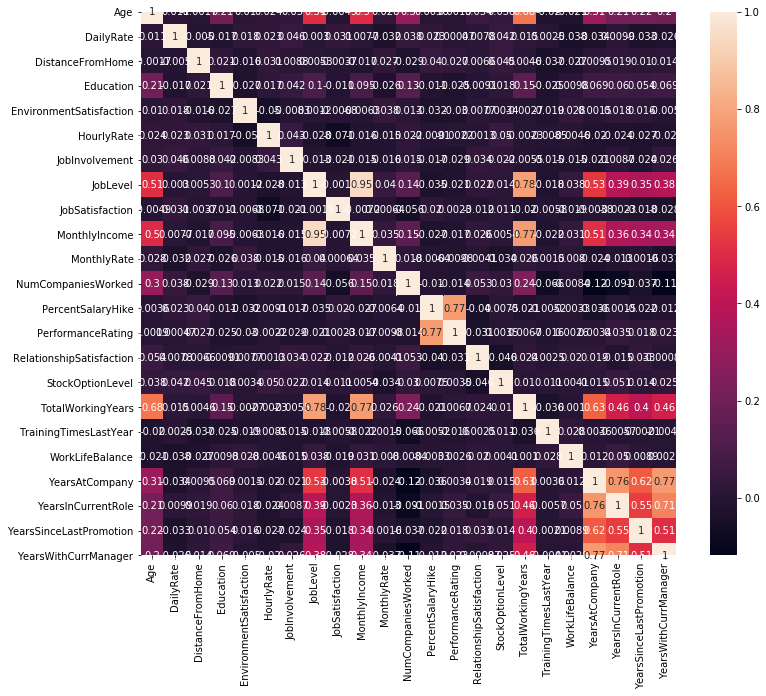

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
left = df.loc[(df.Attrition=='Yes')]
retain = df.loc[(df.Attrition=='No')]

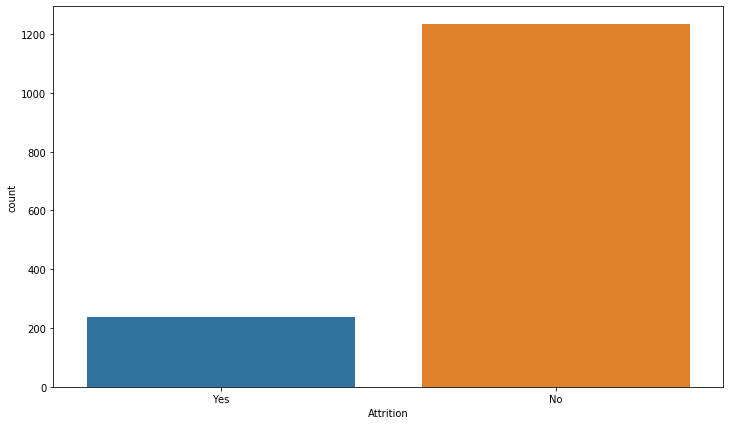

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(x='Attrition',data=df)

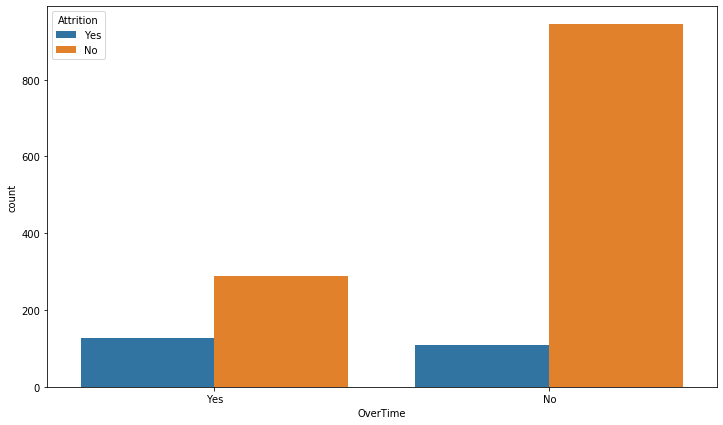

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='OverTime',data=df,hue='Attrition')

Text(0.5, 1.0, 'Average JobInvolvement for left and retain')

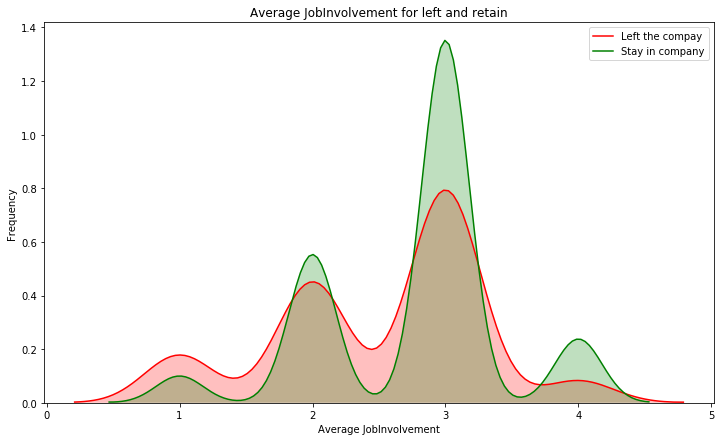

In [16]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(left.JobInvolvement,color='r',label='Left the compay',shade=True)
ax=sns.kdeplot(retain.JobInvolvement,color='g',label='Stay in company',shade=True)
ax.set(xlabel='Average JobInvolvement',ylabel='Frequency')
plt.title('Average JobInvolvement for left and retain')

Text(0.5, 1.0, 'Average PercentSalaryHike for left and retain')

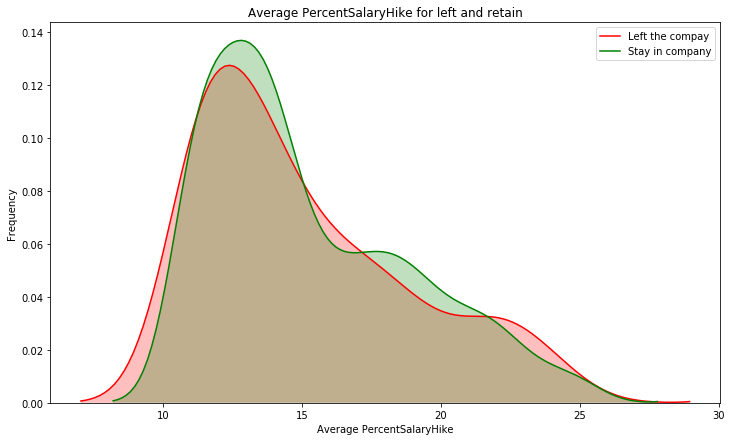

In [17]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(left.PercentSalaryHike,color='r',label='Left the compay',shade=True)
ax=sns.kdeplot(retain.PercentSalaryHike,color='g',label='Stay in company',shade=True)
ax.set(xlabel='Average PercentSalaryHike',ylabel='Frequency')
plt.title('Average PercentSalaryHike for left and retain')

Text(0.5, 1.0, 'Average WorkLifeBalance for left and retain')

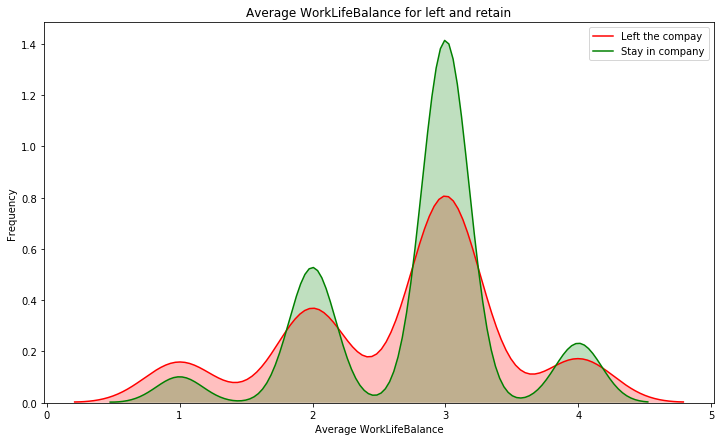

In [18]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(left.WorkLifeBalance,color='r',label='Left the compay',shade=True)
ax=sns.kdeplot(retain.WorkLifeBalance,color='g',label='Stay in company',shade=True)
ax.set(xlabel='Average WorkLifeBalance',ylabel='Frequency')
plt.title('Average WorkLifeBalance for left and retain')

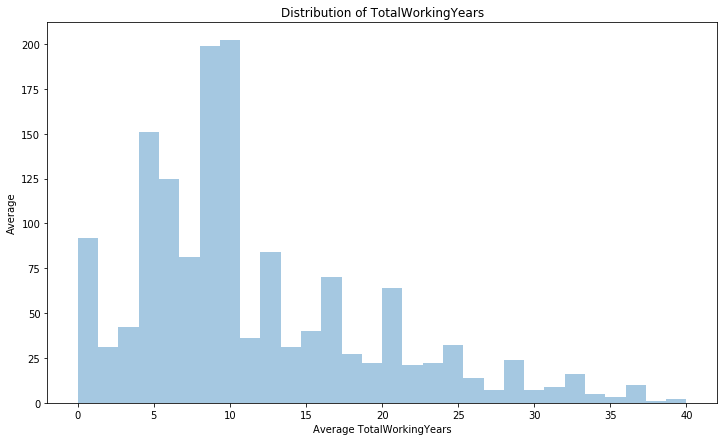

In [19]:
f,ax = plt.subplots(figsize=(12,7))
sns.distplot(df['TotalWorkingYears'],ax=ax,bins=30,kde=False)
plt.title('Distribution of TotalWorkingYears')
plt.xlabel('Average TotalWorkingYears')
plt.ylabel('Average')
plt.show()

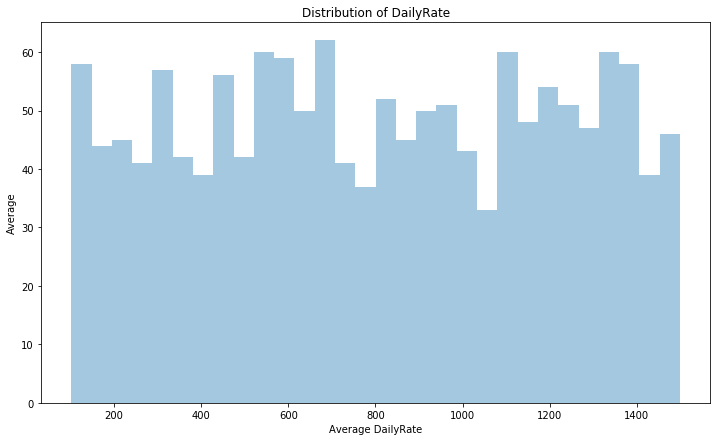

In [20]:
f,ax = plt.subplots(figsize=(12,7))
sns.distplot(df['DailyRate'],ax=ax,bins=30,kde=False)
plt.title('Distribution of DailyRate')
plt.xlabel('Average DailyRate')
plt.ylabel('Average')
plt.show()

Text(0.5, 0.98, 'SatisficationLevel vs TurnOver')

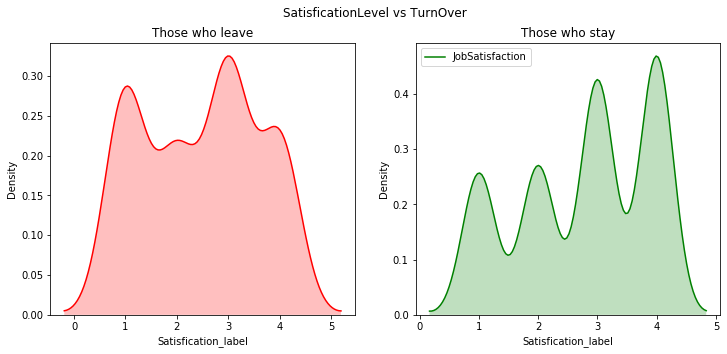

In [21]:
f,ax=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(left.JobSatisfaction,color='r',shade=True,ax=ax[0],legend=False)
ax[0].set_xlabel('Satisfication_label')
ax[0].set_ylabel('Density')
ax[0].set_title('Those who leave')
sns.kdeplot(retain.JobSatisfaction,color='g',shade=True,ax=ax[1])
ax[1].set_xlabel('Satisfication_label')
ax[1].set_ylabel('Density')
ax[1].set_title('Those who stay')
plt.suptitle('SatisficationLevel vs TurnOver')

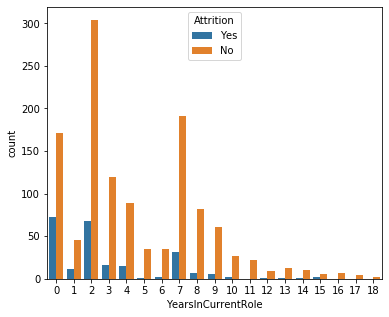

In [22]:
fig = plt.figure(figsize=(6,5))
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=df)

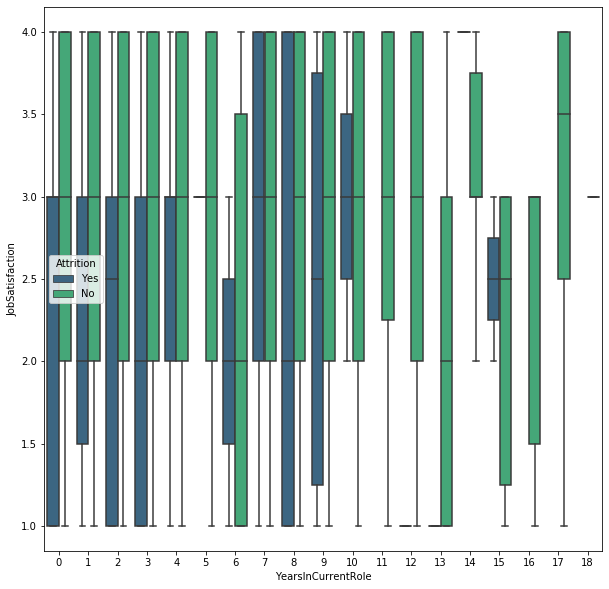

In [23]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='YearsInCurrentRole',y='JobSatisfaction',hue='Attrition',data=df, palette='viridis')

<Figure size 720x576 with 0 Axes>

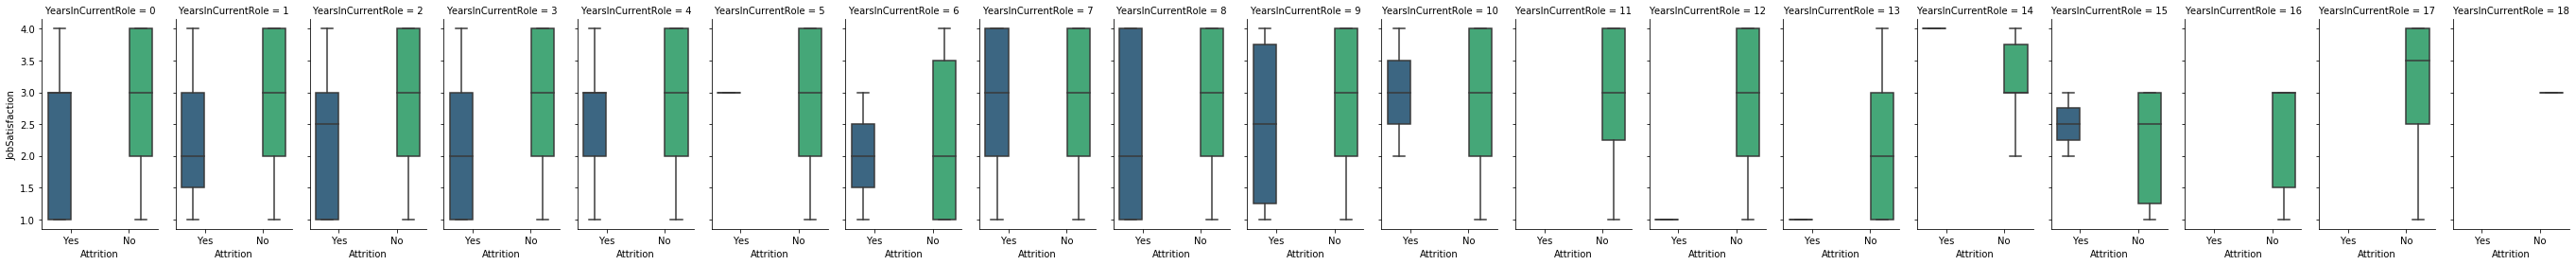

In [24]:
fig = plt.figure(figsize=(10,8))
sns.factorplot(x='Attrition',y='JobSatisfaction',col='YearsInCurrentRole',hue='Attrition',data=df, palette='viridis',kind='box',size=4,
               aspect=0.5)

In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Text(0.5, 1.0, 'YearsSinceLastPromotion')

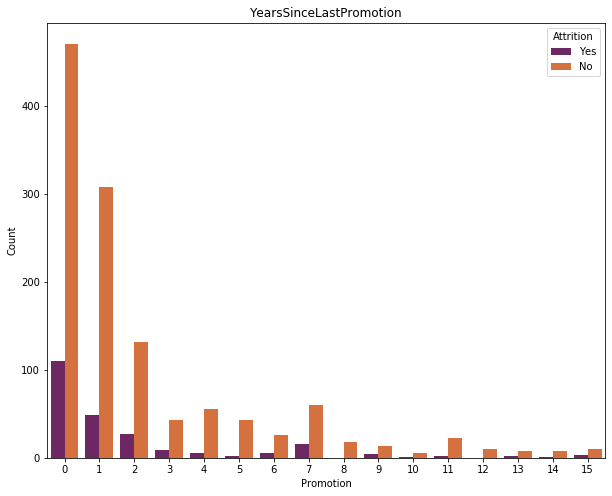

In [26]:
ax=plt.figure(figsize=(10,8))
ax=sns.countplot(x="YearsSinceLastPromotion",hue="Attrition",palette="inferno",data=df)
ax.set_xlabel("Promotion")
ax.set_ylabel("Count")
ax.set_title("YearsSinceLastPromotion")

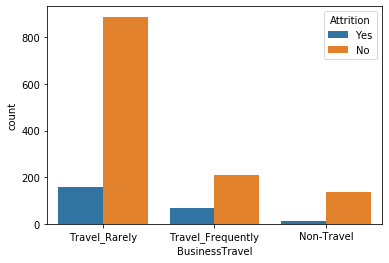

In [27]:
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')

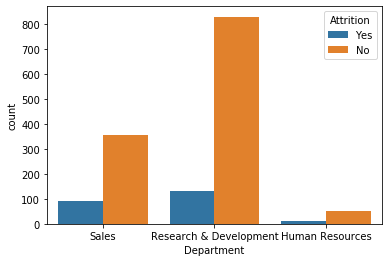

In [28]:
sns.countplot(x='Department',data=df,hue='Attrition')

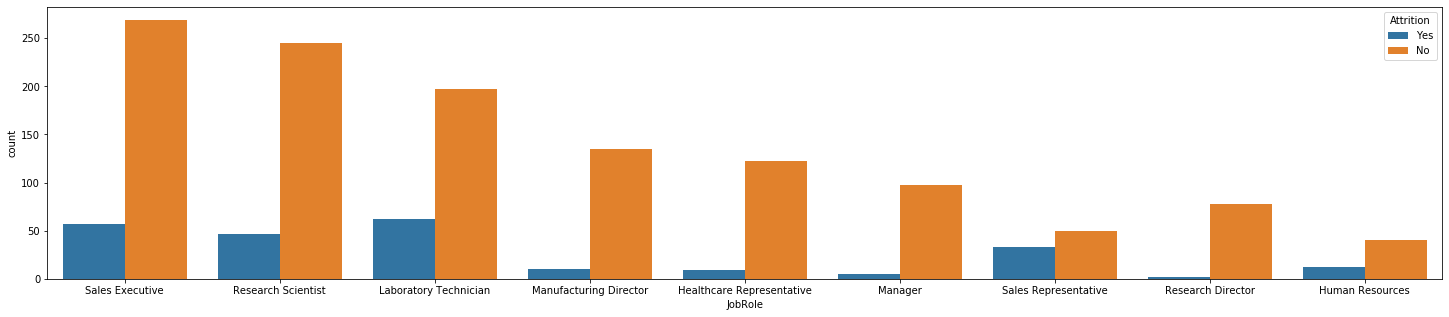

In [29]:
plt.figure(figsize=(25,5))
sns.countplot(x='JobRole',data=df,hue='Attrition')

In [30]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [31]:
df_y = df['Attrition']
df_X=df.drop(columns='Attrition',axis = 1)

In [32]:
#lets treat the skewness in the input dataset
import numpy as np
for index in df_X.skew().index:
    if df_X.skew().loc[index]>0.5:
        df_X[index]=np.log1p(df_X[index])
    if df_X.skew().loc[index]<-0.5:
        df_X[index]=np.square(df_X[index])

In [33]:
df_X.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [34]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df_y= label_encoder.fit_transform(df_y)

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Overtime'. 
df_X['OverTime']= label_encoder.fit_transform(df_X['OverTime'])

In [35]:
df_catcolumns = df_X.loc[:,df_X.dtypes==np.object].columns
df_catcolumns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [36]:
#Attrition = pd.get_dummies(df['Attrition'])
BusinessTravel = pd.get_dummies(df['BusinessTravel'])
Department = pd.get_dummies(df['Department'])
EducationField = pd.get_dummies(df['EducationField'])
Gender = pd.get_dummies(df['Gender'])
JobRole = pd.get_dummies(df['JobRole'])
MaritalStatus = pd.get_dummies(df['MaritalStatus'])
df_X = pd.concat([df_X,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus],axis=1)
print(df_X.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Human Resources', 'Research & Development', 'Sales',
       'Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'Female', 'Male', 'Healthcare Representative',
       'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scien

In [37]:
df_X.drop(columns=df_catcolumns,inplace=True)

In [38]:
#we use standard scalar to scale data as its a classification problem. as features are not in same scale , 
# as we removed putliers we can use simple standatd scalar isntead of roubustscalar or other
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_X)
X=sc.transform(df_X)
X=pd.DataFrame(X,columns=df_X.columns)

In [39]:
df_X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,0,0,0,0,0,1,0,0,0,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,0,0,0,0,1,0,0,0,1,0
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,1,0,0,0,0,0,0,0,1,0


In [40]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single'],
    

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,df_y,test_size=0.2,stratify=df_y)

from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state=0)
X_train,y_train = SMOTE().fit_sample(X_train.as_matrix(),y_train.ravel())

In [42]:
pd.Series(y_train).value_counts()

1    986
0    986
dtype: int64

In [43]:
pd.Series(y_test).value_counts()

0    247
1     47
dtype: int64

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
def max_score(model,X,y):
    max_score= 0
    cross_max_score = 0
    for r in range(42,100):
        cross_max_score = cross_val_score(model,X,y,cv=10,scoring='roc_auc').mean()
        X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.3,random_state=r)
        over_sample = SMOTE(random_state=0)
        X_train,y_train = SMOTE().fit_sample(X_train.as_matrix(),y_train.ravel())
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        curr_score = roc_auc_score(y_test,pred)
        if(curr_score >max_score):
            max_score = curr_score
            fin_r = r
    print('Max r value',fin_r)
    print('max Score', max_score)
    print('Cross_val_max_Score', cross_max_score)
    return fin_r,max_score,cross_max_score

In [45]:
from sklearn.model_selection import GridSearchCV
def Gridsearchvc(clf,params,cv,scoring_type,X,y):
    return_value=''
    clf = GridSearchCV(clf, params, cv=cv,scoring=scoring_type)
    clf.fit(X,y)
    print(clf.best_params_)
    return clf.best_params_


In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
random_value, max_Score, cross_val_Score = max_score(model,df_X,df_y)

params={"C":[10,20,30],"tol":[0.0005,0.0015,0.0020]}
best_params = Gridsearchvc(model,params,5,'roc_auc',df_X,df_y)


Max r value 91
max Score 0.7467274427302477
Cross_val_max_Score 0.7126006282853853
{'C': 30, 'tol': 0.0005}


In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
random_value, max_Score, cross_val_Score = max_score(model,df_X,df_y)

params={"criterion":['entropy','gini'],"max_leaf_nodes":[50,100,150]}
best_params = Gridsearchvc(model,params,5,'roc_auc',df_X,df_y)

Max r value 93
max Score 0.7011252045826514
Cross_val_max_Score 0.6459125104049078
{'criterion': 'gini', 'max_leaf_nodes': 50}


In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
random_value, max_Score, cross_val_Score = max_score(model,X,df_y)

params={"n_estimators":[10,100,500]}
best_params = Gridsearchvc(model,params,5,'roc_auc',X,df_y)

Max r value 93
max Score 0.7074058919803601
Cross_val_max_Score 0.8003634353489397
{'n_estimators': 500}


In [49]:
#using KNN 
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
random_value, max_Score, cross_val_Score = max_score(model,X,df_y)

params={"n_neighbors":range(1,100)}
best_params = Gridsearchvc(model,params,5,'roc_auc',X,df_y)
best_params

Max r value 89
max Score 0.722896174863388
Cross_val_max_Score 0.6765226560926199
{'n_neighbors': 97}


{'n_neighbors': 97}

In [50]:
#using GradientBoosterAlgorithm 
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
random_value, max_Score, cross_val_Score = max_score(model,X,df_y)

params={
'n_estimators':[10,50,100],
'max_features':[0.5,0.11],
'learning_rate':[0.1,0.15],
'max_depth':[2,4],
'min_samples_leaf':[2,6],
'random_state':[50,70]
}

best_params = Gridsearchvc(model,params,5,'roc_auc',X,df_y)
best_params

Max r value 93
max Score 0.7506137479541733
Cross_val_max_Score 0.8138182400407453
{'learning_rate': 0.15, 'max_depth': 2, 'max_features': 0.11, 'min_samples_leaf': 6, 'n_estimators': 100, 'random_state': 70}


{'learning_rate': 0.15,
 'max_depth': 2,
 'max_features': 0.11,
 'min_samples_leaf': 6,
 'n_estimators': 100,
 'random_state': 70}

In [51]:
from sklearn.metrics import Accuracy_Score,Classification_Report
final_model = 
final_model.fit(X_train,y_train)
predict = final_model.predict(X_test)

SyntaxError: invalid syntax (<ipython-input-51-7278907739d5>, line 2)

In [ ]:
import pickle
file_name='HR_model.pkl'
pickle.dump(final_model,open(file_name,'wb'))

final_model = pickle.load(open(file_name,'rb'))
pred = final_model.predict(X_test)
print(r2_score(y_test,pred))